In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [29]:
from google.colab import files

uploaded = files.upload()

Saving dim_date.csv to dim_date (1).csv
Saving dim_hotels.csv to dim_hotels (1).csv
Saving dim_rooms.csv to dim_rooms (1).csv
Saving fact_aggregated_bookings.csv to fact_aggregated_bookings (1).csv
Saving fact_bookings.csv to fact_bookings (1).csv
Saving meta_data_hospitality.txt to meta_data_hospitality (1).txt
Saving metrics_list.xlsx to metrics_list (1).xlsx


Initial data inspection


In [30]:
dim_date = pd.read_csv("dim_date.csv")
dim_hotels = pd.read_csv("dim_hotels.csv")
dim_rooms = pd.read_csv("dim_rooms.csv")
fact_aggregated_bookings = pd.read_csv("fact_aggregated_bookings.csv")
fact_bookings = pd.read_csv("fact_bookings.csv")

In [31]:
dim_date.info()
dim_date.describe()
dim_hotels.info()
dim_hotels.describe()
dim_rooms.info()
dim_rooms.describe()
fact_aggregated_bookings.info()
fact_aggregated_bookings.describe()
fact_bookings.info()
fact_bookings.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      ob

<bound method NDFrame.describe of                booking_id  property_id booking_date check_in_date  \
0        May012216558RT11        16558   2022-04-27    2022-05-01   
1        May012216558RT12        16558   2022-04-30    2022-05-01   
2        May012216558RT13        16558   2022-04-28    2022-05-01   
3        May012216558RT14        16558   2022-04-28    2022-05-01   
4        May012216558RT15        16558   2022-04-27    2022-05-01   
...                   ...          ...          ...           ...   
134585   Jul312217564RT46        17564   2022-07-29    2022-07-31   
134586   Jul312217564RT47        17564   2022-07-30    2022-07-31   
134587   Jul312217564RT48        17564   2022-07-30    2022-07-31   
134588   Jul312217564RT49        17564   2022-07-29    2022-07-31   
134589  Jul312217564RT410        17564   2022-07-31    2022-07-31   

       checkout_date  no_guests room_category booking_platform  ratings_given  \
0         2022-05-02          3           RT1    direct online            1.0   
1         2022-05-02          2           RT1           others            NaN   
2         2022-05-04          2           RT1          logtrip            5.0   
3         2022-05-02          2           RT1           others            NaN   
4         2022-05-02          4           RT1    direct online            5.0   
...              ...        ...           ...              ...            ...   
134585    2022-08-03          1           RT4     makeyourtrip            2.0   
134586    2022-08-01          4           RT4          logtrip            2.0   
134587    2022-08-02          1           RT4         tripster            NaN   
134588    2022-08-01          2           RT4          logtrip            2.0   
134589    2022-08-01          2           RT4     makeyourtrip            NaN   

       booking_status  revenue_generated  revenue_realized  
0         Checked Out              10010             10010  
1           Cancelled               9100              3640  
2         Checked Out               9100              9100  
3           Cancelled               9100              3640  
4         Checked Out              10920             10920  
...               ...                ...               ...  
134585    Checked Out              32300             32300  
134586    Checked Out              38760             38760  
134587      Cancelled              32300             12920  
134588    Checked Out              32300             32300  
134589      Cancelled              32300             12920  

[134590 rows x 12 columns]>

Data Refinement

In [32]:
# Convert date columns to datetime format
dim_date['date'] = pd.to_datetime(dim_date['date'])
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])

# Convert 'week no' to numeric
dim_date['week no'] = pd.to_numeric(dim_date['week no'], errors='coerce')  # 'coerce' turns invalid parsing into NaN

# Address missing values in 'ratings_given'
# Impute missing values with the mean for simplicity in this example
fact_bookings['ratings_given'].fillna(fact_bookings['ratings_given'].mean(), inplace=True)

# Quick check after transformations
dim_date.info()
fact_aggregated_bookings.info()
fact_bookings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   0 non-null      float64       
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   property_id          9200 non-null   int64         
 1   check_in_date        9200 non-null   datetime64[ns]
 2   room_category        9200 non-null   object        
 3   successful_bookings  9200 non-null   int64         
 4   capacity             9200 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)

<ipython-input-32-25407485fe91>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])
<ipython-input-32-25407485fe91>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])


Exploratory data analysis

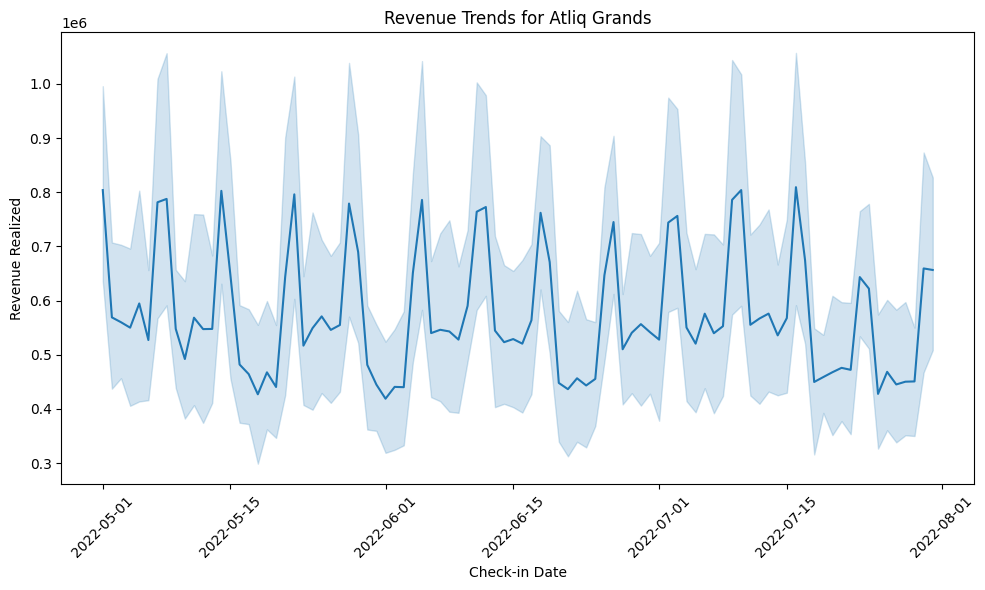

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Aggregating revenue by property and date
# We need to ensure that 'check_in_date' in fact_bookings is used for time-based aggregation
revenue_trends = fact_bookings.groupby(['property_id', 'check_in_date'])['revenue_realized'].sum().reset_index()

# Merging with dim_hotels to get property names
revenue_trends = revenue_trends.merge(dim_hotels[['property_id', 'property_name', 'city']], on='property_id')

# Visualizing revenue trends for a single property as an example
plt.figure(figsize=(10, 6))
example_property = revenue_trends[revenue_trends['property_name'] == revenue_trends['property_name'].iloc[0]]
sns.lineplot(data=example_property, x='check_in_date', y='revenue_realized')
plt.title(f"Revenue Trends for {example_property['property_name'].iloc[0]}")
plt.xlabel('Check-in Date')
plt.ylabel('Revenue Realized')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


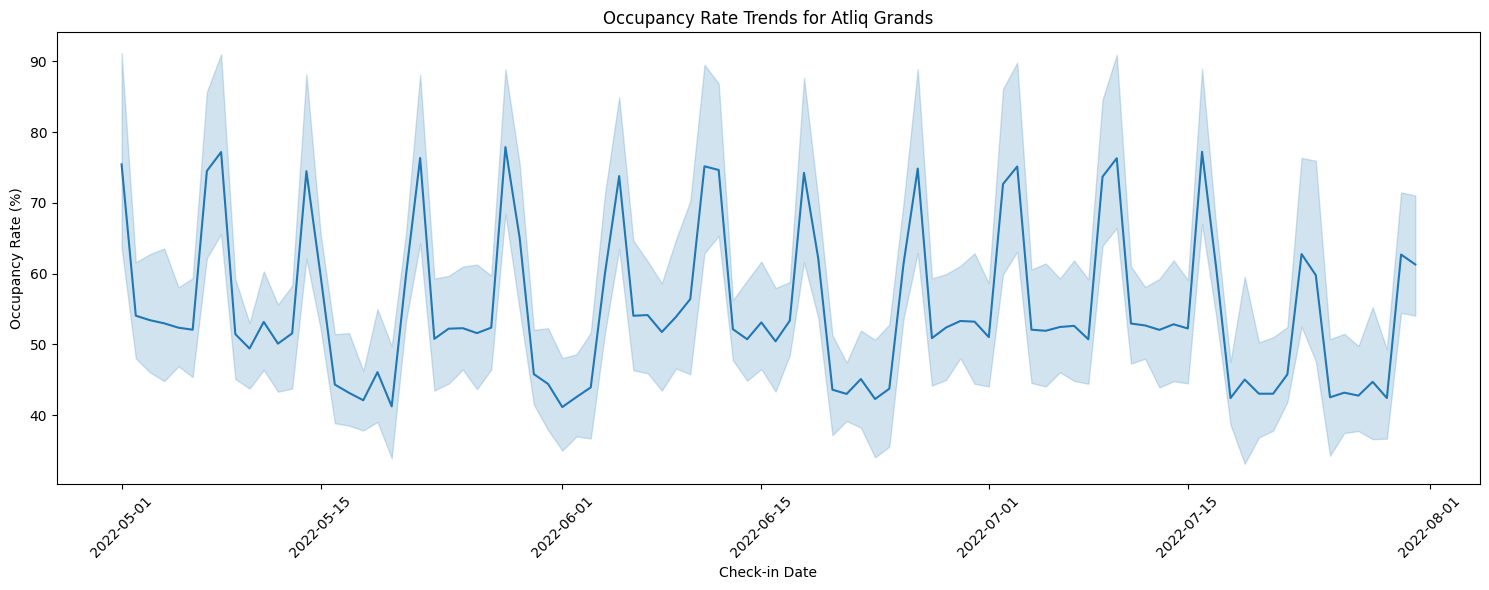

In [34]:
# Calculate occupancy rate
fact_aggregated_bookings['occupancy_rate'] = (fact_aggregated_bookings['successful_bookings'] / fact_aggregated_bookings['capacity']) * 100

# Aggregate data by property and date
occupancy_by_property_date = fact_aggregated_bookings.groupby(['property_id', 'check_in_date'])['occupancy_rate'].mean().reset_index()

# Merge with hotel details
occupancy_by_property_date = occupancy_by_property_date.merge(dim_hotels[['property_id', 'property_name']], on='property_id')

# Example visualization for one property
plt.figure(figsize=(15, 6))
example_property_occupancy = occupancy_by_property_date[occupancy_by_property_date['property_name'] == occupancy_by_property_date['property_name'].iloc[0]]
sns.lineplot(data=example_property_occupancy, x='check_in_date', y='occupancy_rate')
plt.title(f"Occupancy Rate Trends for {example_property_occupancy['property_name'].iloc[0]}")
plt.xlabel('Check-in Date')
plt.ylabel('Occupancy Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Segment Occupancy by Room Class

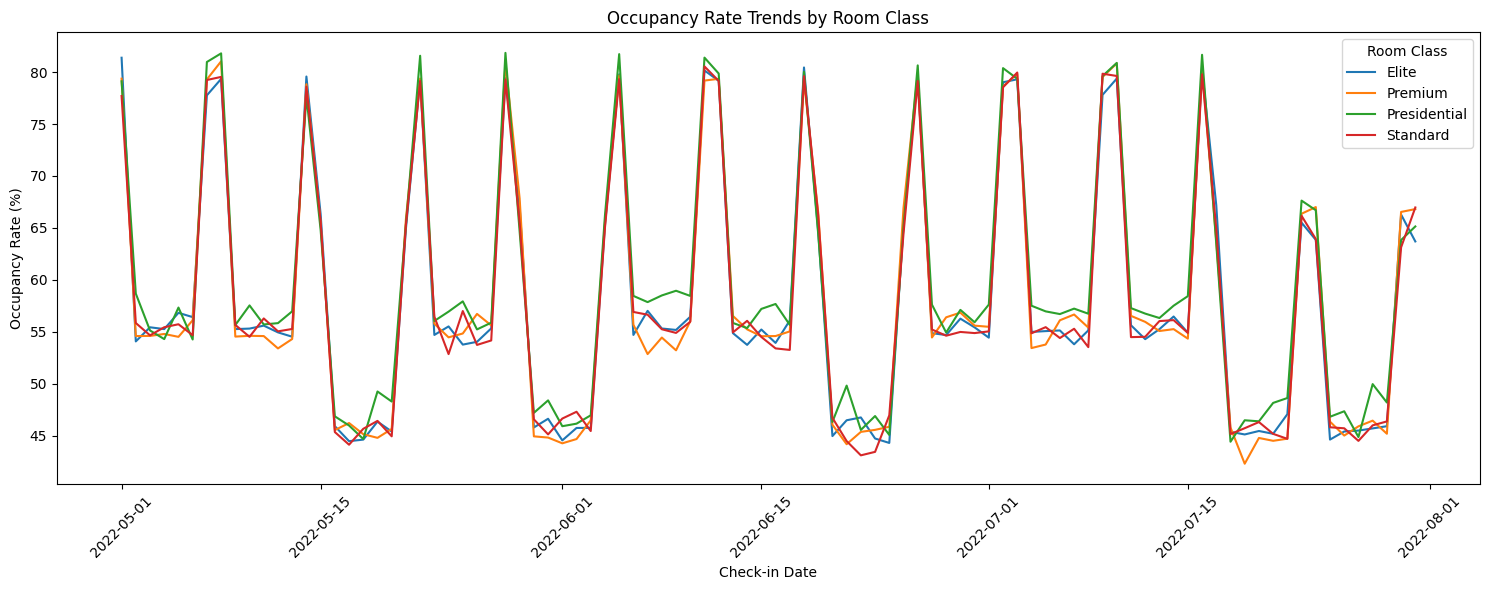

In [35]:
# Merging to include room class information
occupancy_with_room_class = fact_aggregated_bookings.merge(dim_rooms, left_on='room_category', right_on='room_id')

# Calculate average occupancy by room class and date
occupancy_by_room_class = occupancy_with_room_class.groupby(['room_class', 'check_in_date'])['occupancy_rate'].mean().reset_index()

# Visualization for each room class
plt.figure(figsize=(15, 6))
for room_class in occupancy_by_room_class['room_class'].unique():
    data = occupancy_by_room_class[occupancy_by_room_class['room_class'] == room_class]
    sns.lineplot(data=data, x='check_in_date', y='occupancy_rate', label=room_class)
plt.title("Occupancy Rate Trends by Room Class")
plt.xlabel('Check-in Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Room Class')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Segment Occupancy by Day type

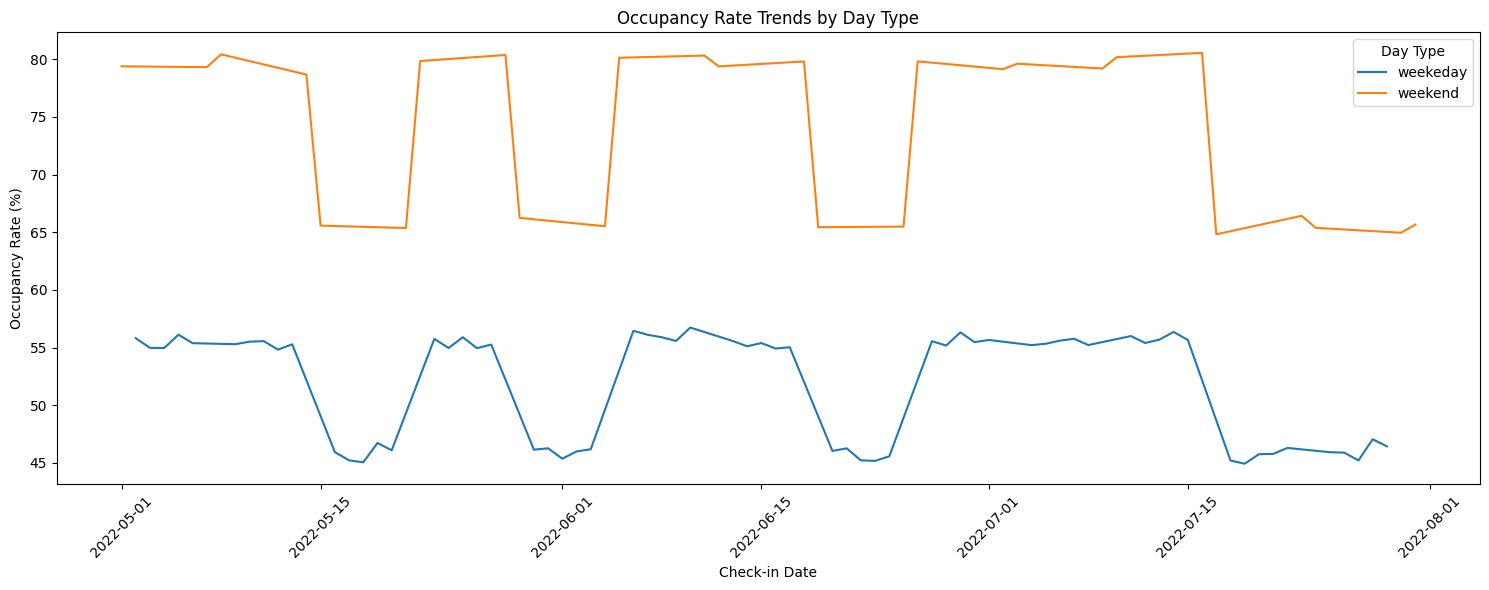

In [36]:
# Merging to include day type information
occupancy_with_day_type = fact_aggregated_bookings.merge(dim_date[['date', 'day_type']], left_on='check_in_date', right_on='date')

# Calculate average occupancy by day type and date
occupancy_by_day_type = occupancy_with_day_type.groupby(['day_type', 'check_in_date'])['occupancy_rate'].mean().reset_index()

# Visualization for day types
plt.figure(figsize=(15, 6))
for day_type in occupancy_by_day_type['day_type'].unique():
    data = occupancy_by_day_type[occupancy_by_day_type['day_type'] == day_type]
    sns.lineplot(data=data, x='check_in_date', y='occupancy_rate', label=day_type)
plt.title("Occupancy Rate Trends by Day Type")
plt.xlabel('Check-in Date')
plt.ylabel('Occupancy Rate (%)')
plt.legend(title='Day Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Further analysis on Occupancy and Revenue

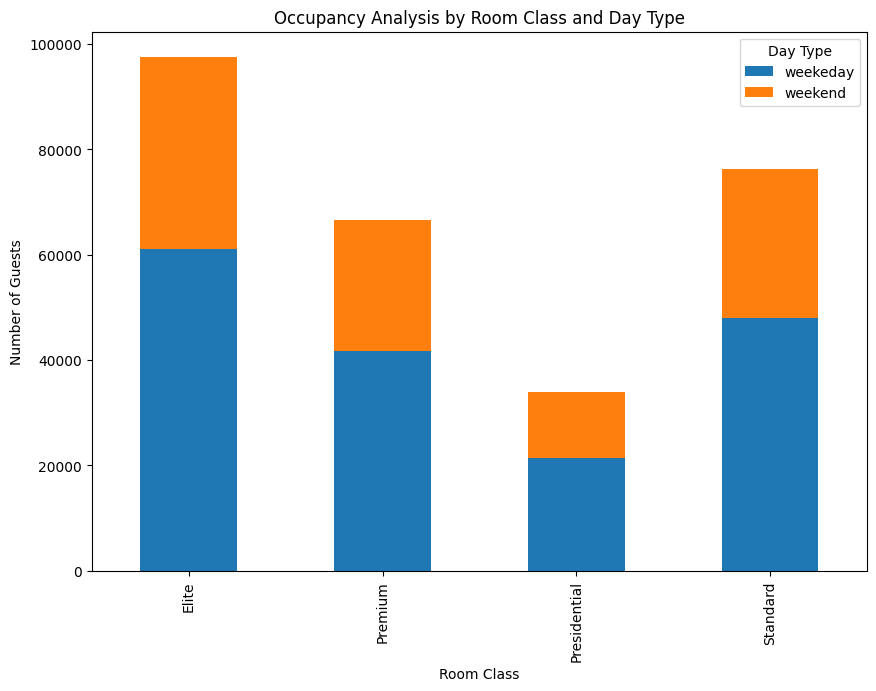

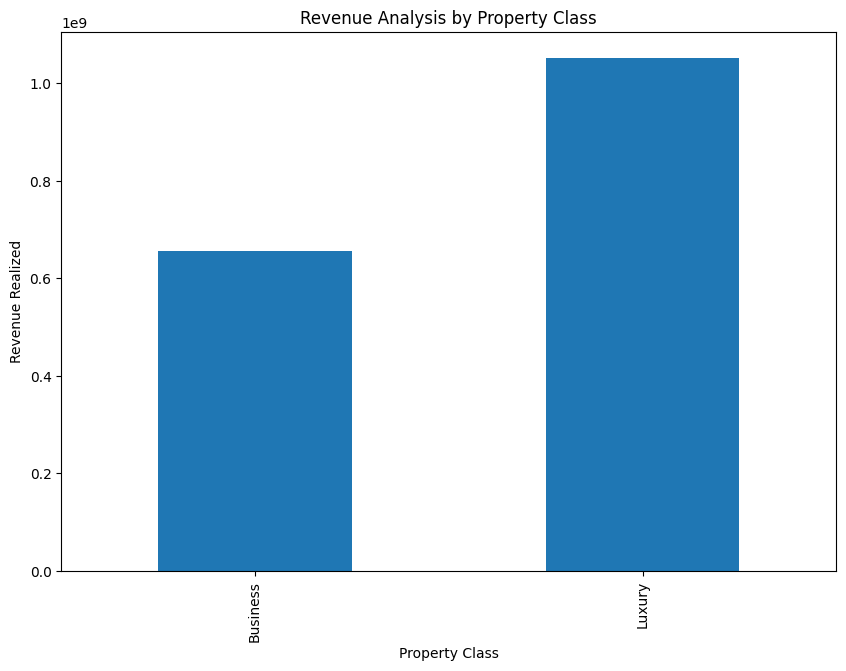

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Merge the room details with booking information
booking_room_details = pd.merge(
    fact_bookings, dim_rooms,
    left_on='room_category', right_on='room_id'
)

# Merge the result with date information to get day types
booking_date_details = pd.merge(
    booking_room_details, dim_date,
    left_on='check_in_date', right_on='date'
)

# For occupancy analysis by room category and day type
occupancy_analysis = booking_date_details.groupby(
    ['room_class', 'day_type']
)['no_guests'].sum().unstack().fillna(0)

# Visualization for occupancy analysis
occupancy_analysis.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title("Occupancy Analysis by Room Class and Day Type")
plt.xlabel('Room Class')
plt.ylabel('Number of Guests')
plt.legend(title='Day Type')
plt.show()

# For revenue analysis by property class
booking_property_details = pd.merge(
    booking_date_details, dim_hotels,
    on='property_id'
)

revenue_analysis = booking_property_details.groupby(
    ['category']
)['revenue_realized'].sum()

# Visualization for revenue analysis
revenue_analysis.plot(kind='bar', figsize=(10, 7))
plt.title("Revenue Analysis by Property Class")
plt.xlabel('Property Class')
plt.ylabel('Revenue Realized')
plt.show()


Predictive Analytics

In [46]:
from sklearn.preprocessing import LabelEncoder

# Convert 'check_in_date' to datetime just in case it hasn't been converted
fact_aggregated_bookings['check_in_date'] = pd.to_datetime(fact_aggregated_bookings['check_in_date'])

# Calculate 'day_of_week' and determine if it's a weekend
fact_aggregated_bookings['day_of_week'] = fact_aggregated_bookings['check_in_date'].dt.dayofweek
fact_aggregated_bookings['is_weekend'] = fact_aggregated_bookings['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Encode 'room_category' with label encoding
label_encoder = LabelEncoder()
fact_aggregated_bookings['room_category_encoded'] = label_encoder.fit_transform(fact_aggregated_bookings['room_category'])

# Define your features matrix X and target variable y
X = fact_aggregated_bookings[['is_weekend', 'room_category_encoded']]  
y = fact_aggregated_bookings['successful_bookings']



In [47]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Model training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Model evaluation using Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 3.7879817745501985


**Insights:**

*Revenue Trends:* The trends show periodic peaks and troughs, which might indicate a correlation with weekends, holidays, or special events. Recognizing these patterns could guide pricing strategies during peak demand periods to maximize revenue.

*Occupancy Rate Trends:* Similar to revenue, occupancy rates exhibit periodic fluctuations. Observing these in tandem with revenue trends might help identify whether certain rates correspond to higher or lower occupancy and whether adjustments could stabilize occupancy during off-peak times.

*Occupancy Rate by Room Class and Day Type:* Different room classes show varying levels of occupancy. Premium and Presidential classes, for example, may benefit from targeted promotions during times when their occupancy is lower. Additionally, the occupancy difference between weekdays and weekends could suggest the potential for weekend-specific marketing or special offers.

*Occupancy Analysis by Room Class and Day Type:* The stacked bar chart suggests that certain room classes are more popular on weekends. This could inform promotional packages or dynamic pricing models to maximize bookings for underperforming room classes.

*Revenue Analysis by Property Class:* The luxury segment appears to generate more revenue than the business class. This might indicate a need to reevaluate the business class strategy or to enhance the luxury experience further to capitalize on its higher revenue generation.

The MAE of our model suggests the predictions are close to the actual number of bookings, with an average error of about 3.8 bookings per prediction. While this indicates a good model performance, it's also essential to consider the business context—whether an average error of this magnitude is acceptable for making operational decisions, like staffing levels or inventory management.

In [49]:
print("End of code.")

End of code.
